##**I. Giới thiệu nhóm**

# **TÌNH HÌNH COVID-19 TẠI CÁC NƯỚC ĐÔNG NAM Á**

##**II. Lý do chọn đề tài**



Covid-19 là<b> đại dịch toàn cầu</b> xuất hiện từ tháng 12 năm 2019 và cho đến nay đã <b>gần 2 năm</b> nhưng làn sóng dịch bệnh này không những không có dấu hiệu dừng lại mà còn lan rộng ra rất nhiều nước trên thế giới. Số ca mắc và số ca tử vong liên tục tăng qua từng ngày. Ngay cả những nước có nền y tế cơ sở vật chất rất phát triển như Mỹ, Anh mà số ca mắc và số ca tử vong còn rất lớn; thì đối với những nước đang phát triển trong khu vực <b>Đông Nam Á</b> thì tình hình dịch bệnh sẽ kinh khủng như thế nào khi hầu hết các nước này là những nước có nền y tế chỉ ở mức trung bình. Để làm rõ vấn đề này thì nhóm chúng tôi quyết định thực hiện bài phân tích về những diễn biến của dịch bệnh Covid 19 tại khu vực Đông Nam Á.

#### <b> Download dữ liệu

In [ ]:
#@title
!gdown --id 1rK6PyQcdzFXCbSh9rmVjssVKWIbB1YAp
!unzip DataCovid19.zip

Downloading...
From: https://drive.google.com/uc?id=1rK6PyQcdzFXCbSh9rmVjssVKWIbB1YAp
To: /content/DataCovid19.zip
100% 40.7k/40.7k [00:00<00:00, 37.1MB/s]
Archive:  DataCovid19.zip
   creating: DATA-Cov19-in-SEA/
  inflating: DATA-Cov19-in-SEA/Cov19-Recovered.csv  
  inflating: DATA-Cov19-in-SEA/Cov19-Deaths.csv  
  inflating: DATA-Cov19-in-SEA/Cov19-Confirmed.csv  
  inflating: DATA-Cov19-in-SEA/hospital_beds_per_thousand.csv  
  inflating: DATA-Cov19-in-SEA/people_fully_vaccinated.csv  


#### <b>Import các thư viện cần thiết

In [ ]:
#@title
!pip install bar_chart_race
!pip install plotly

     |████████████████████████████████| 156 kB 5.3 MB/s 


In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools
pd.set_option('display.max_columns',5000000)
pd.set_option('display.max_rows',5000000)
import warnings  
warnings.filterwarnings('ignore')
import bar_chart_race as bcr

####<b> Đọc và xử lí dữ liệu

In [ ]:
#@title
confirmed_df = pd.read_csv('/content/DATA-Cov19-in-SEA/Cov19-Confirmed.csv')
deaths_df = pd.read_csv('/content/DATA-Cov19-in-SEA/Cov19-Deaths.csv')
recoveries_df = pd.read_csv('/content/DATA-Cov19-in-SEA/Cov19-Recovered.csv')
vacxin_df = pd.read_csv('/content/DATA-Cov19-in-SEA/people_fully_vaccinated.csv')
hospital_beds_per_thousand = pd.read_csv('/content/DATA-Cov19-in-SEA/hospital_beds_per_thousand.csv')

In [ ]:
#@title
confirmed_df.drop(confirmed_df.filter(regex="Unname"),axis=1, inplace=True)
deaths_df.drop(deaths_df.filter(regex="Unname"),axis=1, inplace=True)
recoveries_df.drop(recoveries_df.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
#@title
confirmed_df.head()

Country/Region        Lat        Long  1/22/2020  1/23/2020  1/24/2020  \
0         Brunei   4.535300  114.727700          0          0          0   
1       Cambodia  11.550000  104.916700          0          0          0   
2      Indonesia  -0.789300  113.921300          0          0          0   
3           Laos  19.856270  102.495496          0          0          0   
4       Malaysia   4.210484  101.975766          0          0          0   

   1/25/2020  1/26/2020  1/27/2020  1/28/2020  1/29/2020  1/30/2020  \
0          0          0          0          0          0          0   
1          0          0          1          1          1          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          4          4          4          4          7          8   

   1/31/2020  2/1/2020  2/2/2020  2/3/2020  2/4/2020  2/5/2020  2/6/2020  \
0          0         0         0         0         0         0         0   
1          1         1         1         1         1         1         1   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          8         8         8         8        10        12        14   

   2/7/2020  2/8/2020  2/9/2020  2/10/2020  2/11/2020  2/12/2020  2/13/2020  \
0         0         0         0          0          0          0          0   
1         1         1         1          1          1          1          1   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4        15        16        17         18         18         18         18   

   2/14/2020  2/15/2020  2/16/2020  2/17/2020  2/18/2020  2/19/2020  \
0          0          0          0          0          0          0   
1          1          1          1          1          1          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4         19         22         22         22         22         22   

   2/20/2020  2/21/2020  2/22/2020  2/23/2020  2/24/2020  2/25/2020  \
0          0          0          0          0          0          0   
1          1          1          1          1          1          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4         22         22         22         22         22         22   

   2/26/2020  2/27/2020  2/28/2020  2/29/2020  3/1/2020  3/2/2020  3/3/2020  \
0          0          0          0          0         0         0         0   
1          1          1          1          1         1         1         1   
2          0          0          0          0         0         2         2   
3          0          0          0          0         0         0         0   
4         22         23         25         29        29        29        36   

   3/4/2020  3/5/2020  3/6/2020  3/7/2020  3/8/2020  3/9/2020  3/10/2020  \
0         0         0         0         0         0         1          1   
1         1         1         1         1         2         2          2   
2         2         2         4         4         6        19         27   
3         0         0         0         0         0         0          0   
4        50        55        83        93        99       117        129   

   3/11/2020  3/12/2020  3/13/2020  3/14/2020  3/15/2020  3/16/2020  \
0         11         11         37         40         50         54   
1          3          3          5          7          7          7   
2         34         34         69         96        117        134   
3          0          0          0          0          0          0   
4        149        158        197        238

## **III. Tóm tắt**

Trong báo cáo này, chúng tôi sẽ mô tả tình hình <b>dịch bệnh Covid-19</b> ở 11 nước <b>Đông Nam Á</b> trong thời gian <b>từ ngày 22/1/2020 - 4/8/2021</b> bằng các biểu đồ được sử dụng Python để vẽ. Cụ thể điểm chính mà chúng tôi muốn trình bày cho các bạn thấy là <b>số ca đã nhiễm</b>, <b>số ca tử vong</b>, <b>số ca hồi phục</b> và <b>số ca đang được điều trị</b> ở toàn bộ Đông Nam Á và thậm chí là số liệu chi tiết ở mỗi nước trong khu vực. Bên cạnh đó, <b>số người đã tiêm vacxin đầy đủ</b> và <b>số giường bệnh trên 1.000 người</b> cũng được chúng tôi thể hiện để hiểu rõ hơn chính sách tiêm vaccine cũng như cơ sở y tế hạ tầng của các nước. Thông qua các biểu đồ, chúng tôi mong rằng sẽ phần nào giúp các bạn hiểu hơn diễn biến và tình hình phức tạp do đại dịch gây nên ở Đông Nam Á trong suốt thời gian vừa qua.

In [ ]:
#@title
fig = go.Figure(go.Choropleth(locations = confirmed_df['Country/Region'],
                            locationmode='country names',
                            z = confirmed_df['8/4/2021'],
                            text =confirmed_df['Country/Region'],      
                            colorscale = 'reds',
                            autocolorscale=False,
                            marker_line_color='darkgray',
                            marker_line_width=1,
                        
                          ))

fig.update_layout(
    height=600, width=1100, 
    title_text='Number of people comfirmed in SEA <br>4/8/2021',
    title_x=0.5, title_font_size=20,
    paper_bgcolor="white",
    geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular',
            scope="asia",
            showcountries=False,
            bgcolor="white",
            lonaxis_showgrid=True,
            projection_scale=1.65,
            center_lat=1.283300,
            center_lon=103.833300,
       
    ))
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

## **IV. Tổng quan về Covid-19**

### **1. Covid-19 là gì?**

<b>COVID-19</b> là một loại bệnh do vi-rút có tên <b>SARS-CoV-2</b> gây ra. Căn bệnh này rất dễ lây lan và đã nhanh chóng lan ra khắp thế giới. <b>COVID-19</b> có thể tấn công phổi, hệ hô hấp của người nhiễm và các bộ phận khác của cơ thể người bệnh cũng có thể bị ảnh hưởng bởi căn bệnh này.

<b>Vi-rút Covid-19</b> có khả năng lan truyền rất nhanh từ người sang người, chính vì thế nên đại dịch đã lan rộng ra hầu hết các nước trên thế giới, khiến hàng chục triệu người mắc, hàng triệu người tử vong và chưa có dấu hiệu “hạ nhiệt”. Hầu hết các loại vi rút này có con đường lây truyền bệnh rất nhanh và dễ dàng trong không khí.


###**2. Nguồn gốc**

Covid-19 được tìm thấy ở <b>cả động vật và người</b>. Phát hiện đầu tiên vào tháng 12 năm 2019 ở Vũ Hán, Trung Quốc. Một số chủng virus corona có thể gây cảm lạnh thông thường hoặc nghiêm trọng hơn là <b>Hội chứng Hô hấp Trung Đông (MERS)</b> hoặc<b> Hội chứng Hô hấp cấp tính nặng (SARS)</b>. 



### **3. Hậu quả**


Đại dịch COVID-19 đã gây ra những hậu quả sâu rộng. Đại dịch gây ra <b>suy thoái kinh tế toàn cầu lớn nhất</b> trong lịch sử, với hơn một phần ba dân số thế giới vào thời điểm đó bị phong tỏa. 

Đại dịch còn tác động đến hai trụ cột trong tăng trưởng kinh tế toàn cầu là thương mại và đầu tư, do đó cũng sẽ tác động làm <b>suy giảm tăng trưởng sản lượng</b> tại các nước và gây ảnh hưởng không nhỏ đến ngành du lịch và thương mại. 

Nạn mất việc làm (thất nghiệp do dịch bệnh) ngày càng đang tăng nhanh. Rất nhiều <b>người lao động phải nghỉ việc, giãn việc, mất việc</b> do doanh nghiệp tạm dừng hoạt động hoặc do bị cách ly, điều trị bệnh, ở trong khu vực phong tỏa.


## **V. Tình hình Covid-19 ở Đông Nam Á (ĐNA)**

### **1. Tổng quan tình hình ĐNA đến ngày 4/8/2021**

In [ ]:
#@title
confirmed_group_df = confirmed_df.groupby(by='Country/Region',as_index=False).sum()
deaths_group_df = deaths_df.groupby(by='Country/Region',as_index=False).sum()
recoveries_group_df = recoveries_df.groupby(by='Country/Region',as_index=False).sum()

active_group_df = pd.DataFrame(columns=[confirmed_group_df.columns])
active_group_df = deaths_group_df.copy()
for i in range(confirmed_group_df.shape[0]):
    for j in range(3, confirmed_group_df.shape[1]):
        active_group_df.iloc[i,j] = confirmed_group_df.iloc[i,j]-(recoveries_group_df.iloc[i,j]+deaths_group_df.iloc[i,j])

In [ ]:
#@title 
base_stats = pd.DataFrame(columns=['Dates','Confirmed','Deaths','Recovered','Active'])
base_stats['Dates'] = confirmed_df.columns[4:]

base_stats['Confirmed'] = base_stats['Dates'].apply(lambda x: confirmed_df[x].sum())
base_stats['Deaths'] = base_stats['Dates'].apply(lambda x: deaths_df[x].sum())
base_stats['Recovered'] = base_stats['Dates'].apply(lambda x: recoveries_df[x].sum())
base_stats.reset_index(drop=False, inplace=True)
base_stats['Active'] = base_stats['index'].apply(lambda x: (base_stats['Confirmed'][x]-(base_stats['Deaths'][x]+base_stats['Recovered'][x])))
base_stats.tail()

index      Dates  Confirmed  Deaths  Recovered   Active
555    555  7/31/2021    7318185  147999    5605869  1564317
556    556   8/1/2021    7404878  150443    5671717  1582718
557    557   8/2/2021    7473665  152838    5730252  1590575
558    558   8/3/2021    7573064  155932    5792609  1624523
559    559   8/4/2021    7668592  158810    5856396  1653386

In [ ]:
#@title
latest_stats_fig = go.Figure()
latest_stats_fig.add_trace(go.Treemap(labels = ['Confirmed','Active','Recovered','Deaths'],
                                     parents = ['','Confirmed','Confirmed','Confirmed'],
                                     values = [base_stats['Confirmed'].iloc[559],
                                               base_stats['Active'].iloc[559],
                                               base_stats['Recovered'].iloc[559],
                                               base_stats['Deaths'].iloc[559]],
                                      branchvalues="total", marker_colors = ['#118ab2','#ef476f','#06d6a0','#073b4c'],
                                      textinfo = "label+text+value",
                                      outsidetextfont = {"size": 30, "color": "darkblue"},
                                      marker = {"line": {"width": 2}},
                                        pathbar = {"visible": True}
                                     ))
latest_stats_fig.update_layout(title= 'Latest Status In SEA<br> 4/8/2021',
                               title_x=0.5,
                               title_y=0.84,
                               title_font_size=20,
                               paper_bgcolor="#3a3a3b",
                               template = "plotly_dark",
                               width=1100, 
                               height=300
                               )

latest_stats_fig.show()

Quan sát từ biểu đồ, ta dễ dàng nhận thấy tính đến ngày 4/8/2021 ở Đông Nam Á:

*   Tổng số ca nhiễm của toàn bộ Đông Nam Á là <b>khoảng 7.500.000 ca</b>.
*   Tỷ lệ số ca phục hồi chiếm hơn <b>76%</b> tổng số ca mắc.
*   Tỷ lệ số ca đang điều trị <b>khoảng 22%</b> so với số ca mắc của nước này.
*   Tỷ lệ  số ca chết chiếm <b>2%</b> tổng số ca mắc Covid 19.

Qua đó chúng ta thấy được tuy là khu vực có số ca mắc ở mức tương đối cao nhưng các nước luôn luôn cố gắng hết sức để hạn chế được tỷ lệ tử vong xuống mức thấp nhất có thể</b>.

Con số <b>76%</b> (tỷ lệ người hồi phục sau khi mắc Covid) cũng là một tín hiệu đáng mừng, cho thấy được tình trạng chữa trị cũng như chăm sóc bệnh nhân ở khu vực này rất được quan tâm. Dù con số chỉ số người hồi phục này không quá cao nhưng đó cũng là một việc rất đáng để chúng ta tự hào rồi vì các nước trong khu vực Đông Nam Á là những nước đang có phần thiệt thòi hơn so với các nước ở những khu vực khác về trang thiết bị hay đội ngũ nhân sự (bác sĩ, nhân viên y tế,..).





### **2. Sự thay đổi theo từng ngày trên toàn Đông Nam Á**

In [ ]:
#@title

base_stats_fig = go.Figure()

for column in base_stats.columns.to_list()[2:6]:
    color_dict = {
      "Confirmed": "blue",
      "Active": "red",
      "Recovered": "lightgreen",
      "Deaths": "black"
        }
    base_stats_fig.add_trace(
        go.Scatter(
            x = base_stats['Dates'],
            y = base_stats[column],
            name = column,
            line = dict(color=color_dict[column]),
            hovertemplate ='<br><b>Date</b>: %{x}'+'<br><i>Count</i>:'+'%{y}',
        )
    )
    
for column in base_stats.columns.to_list()[2:6]:
    color_dict = {
      "Confirmed": "lightblue",
      "Active": "#F8778B",
      "Recovered": "#24F9C1",
      "Deaths": "#0C6583"
        }
    base_stats_fig.add_trace(
        go.Scatter(
            x = base_stats['Dates'],
            y = base_stats['index'].apply(lambda x: (base_stats[column][x-7:x].sum())/7 if x>7 else (base_stats[column][0:x].sum())/7),
            name = column+" 7-day Moving Avg.",
            line = dict(dash="dash", color=color_dict[column]), showlegend=False,
            hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day moving avg.</i>: %{y}'
        )
    )
    
base_stats_fig.update_layout(
    updatemenus=[
        dict(
        buttons=list(
            [dict(label = 'All Cases',
                  method = 'update',
                  args = [{'visible': [True, True, True, True, True, True, True, True]},
                          {'title': 'Basic Statistics for Covid19 in SEA<br>All Cases',
                           'showlegend':True}]),
             dict(label = 'Confirmed',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, True, False, False, False]},
                          {'title': 'Basic Statistics for Covid19 in SEA<br>Confirmed',
                           'showlegend':True}]),
             dict(label = 'Active',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False, False, False, True]},
                          {'title': 'Basic Statistics for Covid19 in SEA<br>Active',
                           'showlegend':True}]),
             dict(label = 'Recovered',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False, False, True, False]},
                          {'title': 'Basic Statistics for Covid19 in SEA<br>Recovered',
                           'showlegend':True}]),
             dict(label = 'Deaths',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False, True, False, False]},
                          {'title':'Basic Statistics for Covid19 in SEA<br>Deaths',
                           'showlegend':True}]),
            ]),
             type = "dropdown",
             direction="down",
#             pad={"r": 10, "t": 40},
             showactive=True,
             x=0,
             xanchor="left",
             y=1.25,
             yanchor="top"
        )
    
    ])
base_stats_fig.update_xaxes(showticklabels=False)
base_stats_fig.update_layout(
    height=500, width=1100, 
    title_text="Basic Statistics for Covid19 in SEA", title_x=0.5, title_font_size=20,
                            legend=dict(orientation='h',yanchor='top',y=1.15,xanchor='right',x=1), paper_bgcolor="white",
                            xaxis_title="Date", yaxis_title="Number of Cases")
base_stats_fig.show()

# Daily change in case
daily_case_fig = make_subplots(rows=2, cols=2, vertical_spacing=0.05, horizontal_spacing=0.04, # shared_yaxes=True,
                           subplot_titles=('Confirmed','Active','Recovered','Deaths'),
                            x_title='Dates', y_title='# of Cases')

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Confirmed'][x]-base_stats['Confirmed'][x-1:x].sum()),
                              name='Confirmed',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Confirmed Count</i>: %{y}',
                                marker=dict(color='#118ab2')),row=1, col=1)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Confirmed'][x-7:x].sum()-base_stats['Confirmed'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#149ECC')),row=1, col=1)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Active'][x]-base_stats['Active'][x-1:x].sum()), 
                             name='Active',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Active Count</i>: %{y}',
                               marker=dict(color='#ef476f')),row=1, col=2)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Active'][x-7:x].sum()-base_stats['Active'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#F47C98')),row=1, col=2)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Recovered'][x]-base_stats['Recovered'][x-1:x].sum()), 
                              name='Recovered',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Recovered Count</i>: %{y}',
                               marker=dict(color='#06d6a0')),row=2, col=1)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Recovered'][x-7:x].sum()-base_stats['Recovered'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#24F9C1')),row=2, col=1)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Deaths'][x]-base_stats['Deaths'][x-1:x].sum()), 
                              name='Deaths',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Death Count</i>: %{y}',
                               marker=dict(color='#073b4c')),row=2, col=2)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Deaths'][x-7:x].sum()-base_stats['Deaths'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', line=dict(dash="dash", color='#0C6583')),row=2, col=2)




daily_case_fig.update_xaxes(showticklabels=False)
daily_case_fig.update_layout(
    height=600, width=1100, 
    title_text="Daily change in cases of Covid19 in SEA", title_x=0.5, title_font_size=20,
                            legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1), paper_bgcolor="white",
                            hovermode="x")


daily_case_fig.show()

Nhìn chung, sự thay đổi theo từng ngày của các ca nhiễm và ca hồi phục có sự rõ rệt, ngày càng tăng cao. Trong khi đó, số người đang điều trị và số người tử vong không dao động quá lớn.

 12 tháng của năm 2020 và 2 tháng đầu năm 2021 trung bình mỗi ngày có <b>khoảng 1.000 ca</b> so với ngày trước. Chỉ bắt đầu tăng ngày càng nhiều từ giai đoạn đầu tháng 3, số ca nhiễm trong ngày được ghi nhận luôn ở mức cao và đáng báo động. Cụ thể <b>từ tháng 3/2021</b> thì mỗi ngày ghi nhận <b>hơn 10.000 ca</b> mắc Covid 19. Vào từ khoảng <b>giữa tháng 6/2021</b> đường vẽ thể hiện số ca nhiễm gần như đứng thẳng, leo dốc cao, tăng một cách chóng mặt. Số ca nhiễm mỗi ngày luôn ở <b>mức 40.000-50.000 ca</b>. Đỉnh điểm trong 20 tháng qua là <b>tháng 7 và 8 năm 2021</b> số ca nhiễm trong ngày được ghi nhận là <b>khoảng 100.000 ca</b>.

 Lý do của việc số ca nhiễm tăng nhanh là vì trong khoảng thời gian này các nước phải một lần nữa đón nhận đợt dịch thứ 2 do sự truyền nhiễm những biến thể khác nữa có cấu trúc phức tạp và tốc độ lây lan nhanh hơn rất nhiều lần so với các biến thể trước đây. Các nước lại trong khoảng thời gian này liên tục ghi nhận các ca nhiễm “không triệu chứng” do thời gian ủ bệnh của chúng lâu hơn từ 14-21 ngày, cho nên việc lây từ người sang người trong cộng đồng là rất nhiều do gặp khó khăn trong việc phát hiện và bóc tách F0 ra khỏi cộng đồng.


Cùng với sự gia tăng của số ca nhiễm, số người hồi phục cũng tăng đáng kể. Trong khoảng thời gian từ 23/1/2020 đến 5/2020 số ca hồi phục cũng không có sự tăng giảm mạnh, trung bình mỗi ngày là khoảng dưới <b>1000 ca</b>. Nhưng từ tháng 5/2021 đã bắt đầu có sự tăng vọt, trung bình <B>2000-10.000 ca/ngày</B>. Nếu các nước cứ duy trì được tốc độ như hiện tại thì sẽ sớm hy vọng đẩy lùi được đại dịch.

So với sự dao động tăng nhanh chóng của 2 trường hợp trên, số ca đang điều trị và số ca tử vong lại ổn định hơn. Về số ca tử vong, số ca tăng mỗi ngày tăng thêm khoảng <b>100 - 300 ca</B> trong khoảng thời gian từ 23/1/2020 đến ngày 15/7/2021. Giai đoạn kể từ ngày 15/7/2021 số ca tử vong có dấu hiệu tăng mạnh, cụ thể số ca tử vong do Covid 19 được ghi nhận mỗi ngày khoảng <b>2.000 - 3.000 ca</b> và có dấu hiệu tốc độ tăng của số ca tử vong tăng ngày càng nhanh nhưng vẫn có sự ổn định hơn tốc độ tăng của số ca mắc Covid 19.

Bên cạnh đó, số ca đang điều trị có sự dao động nhẹ. Cụ thể tốc độ số ca đang được điều trị tăng qua từng ngày từ 100 ca mỗi ngày tăng lên tới khoảng <b>1.000 - 2.000 ca/ngày</b> ổn định cho đến khoảng tháng 5/2021. Những ngày tiếp sau đó, số ca mắc Covid đang điều trị bắt đầu có sự tăng vọt lên đến khoảng <b>10.000 ca/ngày</b>. Đặc biệt là khoảng thời gian từ đầu tháng 7/2021 số ca đang được điều trị có thể nói rằng nó đã gần đến đỉnh điểm với dao động trung bình mỗi ngày hơn <b>30.000 ca/ngày</b>. Với sự gia tăng mạnh mẽ như thế, Đông Nam Á là điểm dịch Covid-19 nóng nhất của châu Á.




### **3. Tỉ lệ người hồi phục và người tử vong**

In [ ]:
#@title
imp_ratios_fig = go.Figure()
color_dict = {
  "Confirmed": ["#00c738",(base_stats['Recovered']/base_stats['Confirmed'])*100, 'Recovered/100 Cases','#149ECC'],
   "Deaths": ["red",(base_stats['Deaths']/base_stats['Confirmed'])*100, 'Deaths/100 Cases','#0C6583']
    }
for column in base_stats.columns.to_list()[2:4]:

    imp_ratios_fig.add_trace(go.Scatter(x = base_stats['Dates'],y = color_dict[column][1],
            name = color_dict[column][2],line = dict(color=color_dict[column][0]),
            hovertemplate ='<br><b>Date</b>: %{x}'+'<br><i>Ratio </i>:'+'%{y}'+'%'))
    imp_ratios_fig.add_trace(go.Scatter(x = base_stats['Dates'],y = [color_dict[column][1].mean()]*base_stats['Dates'].shape[0],
            name = "Mean value",line = dict(dash="dash", color=color_dict[column][3]),
            hovertemplate ='<br><i>Mean value </i>:'+'%{y}', visible=False))

imp_ratios_fig.update_layout(
    updatemenus=[
        dict(
        buttons=list(
            [dict(label = 'All Ratios',
                  method = 'update',
                  args = [{'visible': [True, False, True, False]},
                          {'title': 'Ratios for Covid19 in SEA <br>All Ratios',
                           'showlegend':True}]),
             dict(label = 'Deaths/100 Cases<br>(Mortality rate)',
                  method = 'update',
                  args = [{'visible': [False,False , True, True]},
                          {'title': 'Ratios for Covid19 in SEA<br>Mortality rate',
                           'showlegend':True}]),
       
             dict(label = 'Recovered/100 Cases<br>(Recovery rate)',
                  method = 'update',
                  args = [{'visible': [True,True, False,False]},
                          {'title': 'Ratios for Covid19 in SEA <br>Recovery rate',
                           'showlegend':True}]),
           
            ]),
             type = "dropdown",
             direction="down",
             pad={"r": 0, "t": 0},
             showactive=True,
             x=0,
             xanchor="left",
             y=1.2,
             yanchor="top"
        )
    ])

imp_ratios_fig.update_xaxes(showticklabels=False)
imp_ratios_fig.update_layout(
    height=500, width=1100, 
    title_text="Ratios for Covid19 in SEA", title_x=0.5, title_font_size=20,
                            legend=dict(orientation='h',yanchor='top',y=1.12,xanchor='right',x=1), paper_bgcolor="#3a3a3b",
                            xaxis_title="Date", yaxis_title="Ratio", hovermode="x",
                             template = "plotly_dark")
imp_ratios_fig.show()

Quan sát đồ thị, ta thấy tỉ lệ số người hồi phục trên 100 ca nhiễm cao hơn nhiều so với tỉ lệ số người tử vong trên 100 ca nhiễm thể hiện khả năng điều trị covid-19 đang có những bước tiến triển tích cực.

*   Từ 22/1/2021, tỉ lệ người hồi phục có sự gia tăng mạnh trong nửa thời gian đầu và khá ổn định ở nửa thời gian sau. Trong khoảng 3 tháng đầu, có giai đoạn từ ngày 10/2/2020 đến 3/3/2020, tỉ lệ này tăng vượt trội lên đến <b>73,76%</b>  rồi lại trượt dốc xuống còn <b>10%</b> vào ngày 23/3/2020. Những ngày còn lại trong nửa đầu thời gian này đều có sự tăng giảm thất thường nhưng nhìn chung thì có sự gia tăng. Vào nửa thời gian sau, tỉ lệ số người hồi phục trên 100 ca nhiễm không có sự thay đổi quá lớn. Từ ngày 29/4 đến ngày 4/8/2021 tỉ lệ người hồi phục có xu hướng giảm nhẹ.
*   So với sự biến đổi mạnh mẽ của tỷ lệ người hồi phục thì tỉ lệ ca tử vong chỉ có những biến động nhẹ và từ khoảng thời gian tháng 4/2020 luôn có xu hướng giảm nhẹ theo từng ngày, đây cũng là một tín hiệu đáng mừng trong việc chữa trị bệnh covid-19. Đặc biệt là từ ngày 27/4/2020 đến 4/8/2021 tỉ lệ trung bình lệ khoảng <b>2,2%</B>. Cao nhất vào ngày 13/4/2020 với tỉ lệ <b>4,15%</b> và thấp nhất vào ngày 27/2/2020 với tỉ lệ <b>0,56%</b>.

Nhìn chung, ta thấy được mức chênh lệch rất lớn giữa tỉ lệ số tử vong và số ca hồi phục, đây là những tín hiệu đáng mừng về khả năng chữa trị covid-19. Tuy nhiên con số hồi phục vẫn còn có những biến động bất thường nên chúng ta cần có những phương pháp hiệu quả hơn để tỉ lệ người hồi phục được nâng cao hơn.








### **4. Số ca nhiễm từng ngày ở mỗi nước Đông Nam Á**

Tình hình diễn biến của các nước nhiều phần bị tác động bởi công tác phòng chống dịch. Và chắc chắn rằng trong đó không thể không kể đến các chính sách tiêm vacxin và cơ sở y tế hạ tầng. Trước khi đi đến biểu đồ thể hiện số ca nhiễm hàng ngày ở mỗi nước Đông Nam Á thì chúng ta sẽ cùng đi qua hai biểu đồ dưới đây.

####<b> Số người đã tiêm đủ vacxin tại khu vực ĐNA

In [ ]:
#@title
vacxin_group_df = vacxin_df.groupby(by='Country/Region',as_index=False).sum()
vacxin_group_sorted_df = vacxin_group_df.sort_values(by=vacxin_group_df.columns[-1], ascending=False)

In [ ]:
#@title
sea_ani = pd.DataFrame(columns=['Dates','Count', 'Country'])
Count, Dates, Country = [],[],[]
for i in range(11):
        tree = []
        Count.extend(vacxin_group_sorted_df[vacxin_group_sorted_df.columns[3:]][i:i+1].T.values.tolist())
        Dates.extend(vacxin_group_sorted_df.columns[3:])
        tree.append(vacxin_group_sorted_df.iloc[i,0])
        tree = tree*(vacxin_group_sorted_df.shape[1]-3)
        Country.extend(tree)
sea_ani['Count'] = pd.DataFrame(Count)[0]
sea_ani['Dates'] = pd.DataFrame(Dates)[0]
sea_ani['Country'] = pd.DataFrame(Country)[0]

In [ ]:
#@title
fig = go.Figure(go.Choropleth(locations = vacxin_df['Country/Region'],
                            locationmode='country names',
                            z = vacxin_df['8/4/2021'],
                            text =vacxin_df['Country/Region'],      
                            colorscale = 'Greens',
                            autocolorscale=False,
                            marker_line_color='green',
                            marker_line_width=1.5
            
                          ))

fig.update_layout(height=600, width=1100, 
    title_text='Number of people fully vaccinated by SEA (4/8/2021)',
    title_x=0.5, title_font_size=20,
                                     paper_bgcolor="white",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        scope="asia",
        showcountries=False,
        bgcolor="white",
        lonaxis_showgrid=True,
        projection_scale=1.75,
        center_lat=4.210484,
        center_lon=101.975766	
    ))
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})

fig.show()
cases_over_time_fig = px.scatter_geo(sea_ani, locations='Country', color="Country",locationmode='country names',
                     hover_name="Country", size="Count", size_max=50,
                     animation_frame="Dates"
                                    )

cases_over_time_fig.update_layout(height=600, width=1100, 
    title_text='Number of people fully vaccinated in SEA ',
    title_x=0.45, title_font_size=20,
    paper_bgcolor="white",
    
    geo=dict(
        countrycolor = "green",
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        scope="asia",
        showcountries=True,
        bgcolor="#bfffc7",
        lonaxis_showgrid=True,
        projection_scale=1.75,
        center_lat=4.210484,
        center_lon=101.975766	
    ))

cases_over_time_fig.update_layout({
    'geo': {
        'resolution': 50
    }
})


cases_over_time_fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 5
cases_over_time_fig.show()

Tính đến ngày 4/8/21: 

*   <b>VietNam:</b> số người đã tiêm vaccine đầy đủ ở Việt Nam là <b>778.986 người</b> chiếm <b>0,8%</b> số dân Việt Nam
*   <b>Laos:</b> ở Lào là <b>119.460 người</b> chiếm <b>15,9%</b> số dân Lào 
*   <b>Thailand:</b> ở Thái Lan là <b>4.178.702 người</b> chiếm <b>6,2%</b> số dân Thái Lan
*   <b>Cambodia:</b> ở Campuchia là<b> 5.210.115 người</b> chiếm <b>33,7%</b> số dân Campuchia
*   <b>Myanmar:</b> ở Myanmar là <b>1.800.000 người</b> chiếm <b>3%</b> số dân Myanmar
*   <b>Malaysia:</b> ở Malaysia là <b>7.767.887 người</b> chiếm <b>25,3%</b> số dân Malaysia
*   <b> Singapore</b>: ở Singapore là <b>3.618.488 người</b> chiếm <b>66,2%</b> dân số Singapore
*    <b>Philippines:</b> ở Philippines là <b>10.710.000 người</b> chiếm <b>10,3%</B> dân số Philippines
*   <b>Indonesia:</b> ở Indonesia là <b> 2.197.663 người</b> chiếm <b>8,6%</b> dân số Indonesia
*   <b>Brunei:</b> ở Brunei là <b>35.874 người</b> chiếm <b>8,6%</b> dân số Brunei
*   <b>Timor-Leste:</b> ở Timor là <b>103.208 người</b> chiếm <b>8,6%</b> dân số Timor. 

Như vậy, Singapore là nước có tỉ lệ số người tiêm nhiều nhất so với toàn dân số, nước đã tiêm có tỷ lệ thấp nhất là Việt Nam. Chênh lệch giữa 2 quốc gia này là <b>65,4%</b>. Việt Nam là nước có tỷ lệ tiêm vacxin thấp nhất tính đến 4/8/2021 là do nước ta vẫn phải mua vacxin từ nước ngoài nhưng chi phí cho việc này là rất lớn, nhất thời nước ta chưa thể đáp ứng đủ cho tất cả mọi người nên phần lớn lượng vacxin của quốc gia phụ thuộc vào các chính sách ngoại giao giữa nước ta với các nước trên thế giới để tìm nguồn trợ cấp vacxin cho nước ta từ các nước.  Mà việc này cần có một khoảng thời gian nên tỷ lệ bao phủ vacxin của nước ta là rất thấp.




#### <b> Số giường bệnh trên một nghìn người

In [ ]:
#@title
hospital_beds_per_thousand.head()

Country/Region        Lat        Long  3/27/2020  3/28/2020  3/29/2020  \
0         Brunei   4.535300  114.727700       2.70       2.70       2.70   
1       Cambodia  11.550000  104.916700       0.80       0.80       0.80   
2      Indonesia  -0.789300  113.921300       1.04       1.04       1.04   
3           Laos  19.856270  102.495496       1.50       1.50       1.50   
4       Malaysia   4.210484  101.975766       1.90       1.90       1.90   

   3/30/2020  3/31/2020  4/1/2020  4/2/2020  4/3/2020  4/4/2020  4/5/2020  \
0       2.70       2.70      2.70      2.70      2.70      2.70      2.70   
1       0.80       0.80      0.80      0.80      0.80      0.80      0.80   
2       1.04       1.04      1.04      1.04      1.04      1.04      1.04   
3       1.50       1.50      1.50      1.50      1.50      1.50      1.50   
4       1.90       1.90      1.90      1.90      1.90      1.90      1.90   

   4/6/2020  4/7/2020  4/8/2020  4/9/2020  4/10/2020  4/11/2020  4/12/2020  \
0      2.70      2.70      2.70      2.70       2.70       2.70       2.70   
1      0.80      0.80      0.80      0.80       0.80       0.80       0.80   
2      1.04      1.04      1.04      1.04       1.04       1.04       1.04   
3      1.50      1.50      1.50      1.50       1.50       1.50       1.50   
4      1.90      1.90      1.90      1.90       1.90       1.90       1.90   

   4/13/2020  4/14/2020  4/15/2020  4/16/2020  4/17/2020  4/18/2020  \
0       2.70       2.70       2.70       2.70       2.70       2.70   
1       0.80       0.80       0.80       0.80       0.80       0.80   
2       1.04       1.04       1.04       1.04       1.04       1.04   
3       1.50       1.50       1.50       1.50       1.50       1.50   
4       1.90       1.90       1.90       1.90       1.90       1.90   

   4/19/2020  4/20/2020  4/21/2020  4/22/2020  4/23/2020  4/24/2020  \
0       2.70       2.70       2.70       2.70       2.70       2.70   
1       0.80       0.80       0.80       0.80       0.80       0.80   
2       1.04       1.04       1.04       1.04       1.04       1.04   
3       1.50       1.50       1.50       1.50       1.50       1.50   
4       1.90       1.90       1.90       1.90       1.90       1.90   

   4/25/2020  4/26/2020  4/27/2020  4/28/2020  4/29/2020  4/30/2020  5/1/2020  \
0       2.70       2.70       2.70       2.70       2.70       2.70      2.70   
1       0.80       0.80       0.80       0.80       0.80       0.80      0.80   
2       1.04       1.04       1.04       1.04       1.04       1.04      1.04   
3       1.50       1.50       1.50       1.50       1.50       1.50      1.50   
4       1.90       1.90       1.90       1.90       1.90       1.90      1.90   

   5/2/2020  5/3/2020  5/4/2020  5/5/2020  5/6/2020  5/7/2020  5/8/2020  \
0      2.70      2.70      2.70      2.70      2.70      2.70      2.70   
1      0.80      0.80      0.80      0.80      0.80      0.80      0.80   
2      1.04      1.04      1.04      1.04      1.04      1.04      1.04   
3      1.50      1.50      1.50      1.50      1.50      1.50      1.50   
4      1.90      1.90      1.90      1.90      1.90      1.90      1.90   

   5/9/2020  5/10/2020  5/11/2020  5/12/2020  5/13/2020  5/14/2020  5/15/2020  \
0      2.70       2.70       2.70       2.70       2.70       2.70       2.70   
1      0.80       0.80       0.80       0.80       0.80       0.80       0.80   
2      1.04       1.04       1.04       1.04       1.04       1.04       1.04   
3      1.50       1.50       1.50       1.50       1.50       1.50       1.50   
4      1.90       1.90       1.90       1.90       1.90       1.90       1.90   

   5/16/2020  5/17/2020  5/18/2020  5/19/2020  5/20/2020  5/21/2020  \
0       2.70       2.70       2.70       2.70       2.70       2.70   
1       0.80       0.80       0.80       0.80       0.80       0.80   
2       1.04       1.04       1.04       1.04       1.04       1.04   
3       1.50       1.50       1.50       1.50     

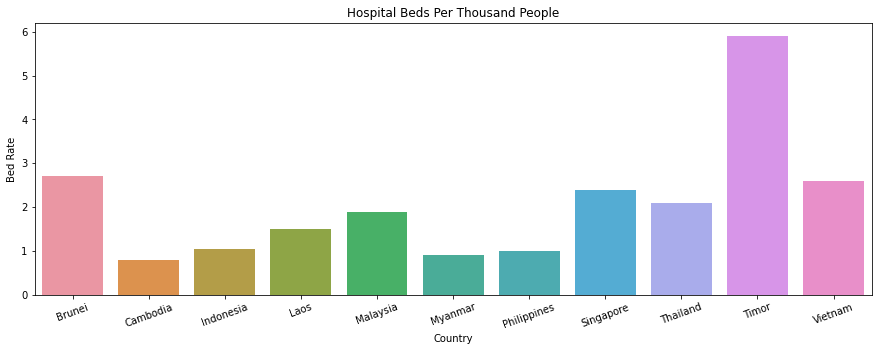

In [ ]:
#@title
plt.figure(figsize=(15,5))
sns.barplot(x='Country/Region', y= '3/27/2020', data=hospital_beds_per_thousand)
plt.xticks(rotation = 20)
plt.xlabel('Country')
plt.ylabel('Bed Rate')
plt.title('Hospital Beds Per Thousand People')
plt.show()

Nhìn chung, số giường bệnh của các nước ĐNA có sự khác nhau. Nước có số giường bệnh nhiều nhất là Đông-ti-mo, <b>gấp gần 2 lần</b> so với Brunei là nước có số giường bệnh nhiều thứ hai. Việt Nam có số giường bệnh xấp xỉ, chỉ hơi ít so với hơn Brunei. Hai nước có tỷ lệ số giường bệnh/ 1000 người dân thấp nhất là Cambodia và Myanmar lần lượt <b>0,8</b> và <b>0,9</b>.





Trước tình hình tiêm chủng và chính sách phòng chống dịch như thế thì tình hình các ca nhiễm trong ngày ở mỗi nước sẽ ra sao? Thay đổi như thế nào? Chúng ta sẽ được tìm hiểu ở phần tiếp theo.

#### <b> Số ca nhiễm mới theo từng ngày ở các nước ĐNA 

In [ ]:
#@title
confirmed_group_melted_df = pd.melt(confirmed_group_df, id_vars=['Country/Region'], value_vars=confirmed_group_df.columns[3:])
confirmed_group_melted_df.rename(columns={"variable": "Dates", "value": "Confirmed"}, inplace=True)

In [ ]:
#@title

country_specific_fig = make_subplots(specs=[[{"secondary_y": True}]])
df_dict={
  "Confirmed": [confirmed_group_melted_df ,"#118ab2"]}

for country in confirmed_group_df.sort_values(by=confirmed_group_df.columns[-1], ascending=False)['Country/Region'].values.tolist()[:40]:
    country_specific_fig.add_trace(go.Scatter(y=confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].values.tolist()[0],
                                             x=confirmed_group_df.columns[4:],
                                             mode='lines', visible=(lambda x: True if x=="Indonesia" else False)(country), name="Confirmed", showlegend=True,
                                             line = dict(dash="solid", color=df_dict['Confirmed'][1]),
                                             marker_color="lightblue",
                                             hovertemplate ='<br><b>Date</b>: %{x}'+'<br><i>Count</i>:'+'%{y}'
                                             ))
    
    country_specific_fig.add_trace(go.Bar(y=confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().rename(columns={confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().columns[-1]:'count','index':'dates','level_0':'index'})['index'].apply(lambda x: confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().rename(columns={confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().columns[-1]:'count','index':'dates','level_0':'index'})['count'][x]-confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().rename(columns={confirmed_group_df[confirmed_group_df['Country/Region']==country][confirmed_group_df.columns[4:]].T.reset_index().reset_index().columns[-1]:'count','index':'dates','level_0':'index'})['count'][x-1:x].sum()),
                                         x=confirmed_group_df.columns[4:],
                                          name="Daily Confirmed", showlegend=True,
                                          visible=(lambda x: True if x=="Indonesia" else False)(country),
                                          yaxis='y2', opacity=0.7,
                                          marker_color = "red",
                                          hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Daily-Confirmed.</i>: %{y}'
                                          ))

country_specific_fig.update_layout(
updatemenus=[
        dict(
        buttons=list(
            [dict(label = country,
                  method = 'update',
                  args = [{'visible': list(map(lambda x: True if 2*index<=x<=2*index+1 else False, list(range(100))))},
                          {'title': "Daily New Cases in SEA<br>""Country :"+country,
                           'showlegend':True}]) for index, country in enumerate(confirmed_group_df.sort_values(by=confirmed_group_df.columns[-1], ascending=False)['Country/Region'].values.tolist()[:40])
            ]),
             type = "dropdown",
             direction="down",
             pad={"r": 0, "t": 0},
             showactive=True,
             x=0,
             xanchor="left",
             y=1.2,
             yanchor="top"
        )
])

country_specific_fig.update_xaxes(showticklabels=False)
country_specific_fig.update_layout(
                                     height = 600,width=1100,
                                     title_text="Daily New Cases in SEA",
                                     title_x=0.45, title_font_size=20, paper_bgcolor="#3a3a3b",
                                     legend=dict(orientation='v',yanchor='top',y=1.12,xanchor='right',x=1),
                                     yaxis_title="Number of Cases",
                                     xaxis=dict(title='Date'),
                                     hovermode="x", template="plotly_dark"
                                   )
country_specific_fig.show()

<b>Indonesia:</b> Nước này ghi nhận 2 ca nhiễm đầu tiên vào ngày 2/3/2020. Như đã biết Indonesia là nước đông dân thứ 4 thế giới (267 triệu người) với địa hình vạn đảo, rất khó để kiểm soát di chuyển của người dân khiến dịch bệnh dễ lây lan và khó truy vết. Khi dịch bùng phát nước này đã chần chừng lựa chọn giữa bài toán kinh tế và việc phong tỏa đất nước. Indonesia đã chọn không phong tỏa và chỉ những trường hợp mắc Covid 19 có triệu chứng mới được cách ly tập trung. Giới chức nước này đã phản ứng rất chậm, điều đó đồng nghĩa với việc các ca mắc Covid ngày càng tăng với cấp số nhân. Trong vòng từ tháng 3 đến tháng 12 năm 2020 Indonesia đã ghi nhận <b>734.198</b> ca nhiễm covid 19 với hàng nghìn ca nhiễm tăng theo từng ngày. Đầu năm 2021 số ca nhiễm tại nước này tăng mạnh hơn so với năm trước, nguyên nhân là do kỳ nghỉ lễ kéo dài. Cuối tháng 1 năm 2021 nước này ghi nhận <b>1.066.313</b> ca nhiễm, y tế nước này rơi vào khủng hoảng. Trong làn sóng covid thứ 2 vào giữa năm 2021 một lần nữa làm số ca nhiễm tăng đột biến từ tháng 6-8 năm 2021 đỉnh điểm số ca mắc kỷ lục trong ngày là <b>2.780.803</b>, làn sóng Covid mới đã và đang tấn công dữ dội vào Indonesia và nhấn chìm hệ thống y tế của quốc gia này. Indonesia trở thành điểm nóng của khu vực và toàn thế giới.

<b>Philippines:</b> Cũng giống Indonesia, Philippines là một tâm dịch của khu vực Đông Nam Á, với ca ghi nhiễm đầu tiên vào 31/1/2020. Chỉ trong vòng 7 tháng đầu năm 2020 số ca nhiễm tại nước này đã lên tới 134.479, với ca mắc trong ngày tăng <b>từ 100 - 4.000 người/ngày</b>. Từ sau tháng 10/2020 đến đầu tháng 2 năm 2021 số ca nhiễm nước này có xu hướng giảm và tăng đều với số ca nhiễm trong ngày chỉ hơn <b>2.000 người</b>. Từ tháng 3 đến tháng 8/2021 nước này tiếp tục đón sóng covid mới với biến thể Detal làm số ca mắc tăng đỉnh điểm <b>12.546</b> ca nhiễm. Tính đến tháng 8 năm 2021 Philippines đã ghi nhận <b>1.619.824</b> số ca mắc trên cả nước. Trước tình hình dịch bệnh nghiêm trọng nước này đã yêu cầu người dân phải đi tiêm vaccine phòng ngừa, thậm chí có thể bỏ tù nếu chống đối không tiêm chủng.

<b>Malaysia:</b> Vào cuối tháng 8/2020 nước này ghi nhận một biến chủng Covid mới có khả năng lây nhiễm nhanh gấp 10 lần loại virus phát hiện tại Vũ Hán (Trung Quốc). Giới chức và bộ y tế nước này đã triển khai những biện pháp phòng dịch ở mức độ cao hơn trước nhưng điều đó cũng không ngăn được số ca nhiễm tăng. Cuối tháng 9/2020 ca nhiễm nước này đã tăng đến <b>11.224</b> tạo ra áp lực cho nhà nước và hệ thống y tế tại Malaysia. Mặc dù quốc gia này đã thoát được đợt bùng phát dịch nghiêm trọng trong năm 2020 bằng cách thực hiện những biện pháp hạn chế cứng rắn và phong tỏa nhưng số ca nhiễm vẫn bắt đầu tăng mạnh vào đầu năm 2021 khiến nước này phải phát lệnh phong tỏa hoàn toàn Kuala Lumpur. Sự kiện làm quốc gia này trở thành ổ dịch lớn nhất Đông Nam Á diễn ra vào những ngày 27/2 - 1/3 năm 2021 liên quan đến sự kiện tôn giáo ở Selangor gần thủ đô Kuala Lumpur. Malaysia chính thức đón nhận đợt sóng Covid lần 2. Khoảng vào tháng 4-8 năm 2021 nước này ghi nhập đợt bùng phát dịch mạnh mẽ với ca nhiễm liên tục tăng không có dấu hiệu thuyên giảm, số ca nhiễm kỷ lục trong một ngày đạt tới <b>19.819</b> ca. Một lần nữa Đông Nam Á ghi nhận tâm dịch mới là Malaysia.

<b>Thái Lan:</b> Quốc gia xứ sở chùa vàng cũng không thể tránh khỏi ảnh hưởng mạnh mẽ của Covid 19. Vào ngày đầu tháng 1 năm 2020 nước này đã phòng dịch rất tốt. Sau khi dập đợt dịch vào đầu năm nước này đã liên tục trong 6 tháng không ghi nhận ca nhiễm mới trong cộng đồng, đến cuối năm 2020 nước này ghi nhận <b>7.163</B> ca mắc Covid. Tháng 1 năm 2021 Thái Lan đón đợt dịch lần thứ 2 nghiêm trọng hơn rất nhiều. Gần cuối tháng 4 nước này ghi nhận <b>hơn 81.000 ca</b> nhiễm bệnh . Tiếp sau đó mỗi ngày Thái Lan vẫn ghi nhận trên dưới <b>2000</b> ca nhiễm và vẫn đang lên đều chưa thấy có dấu hiệu khả quan. Dù cho Thái Lan không chủ quan với dịch bệnh nhưng số ca mắc của nước này vẫn tăng một cách chóng mặt.

<b>Myanmar:</b> Myanmar cũng không tránh khỏi đại dịch Covid 19. Vào những tháng đầu của 2020, Myanmar xuất hiện vài ca Covid 19 và đã phòng dịch rất tốt. Mặc dù vẫn có ca dương tính nhưng vẫn nằm trong vùng kiểm soát. Từ khoảng cuối tháng 8/2020, Myanmar bắt đầu bùng dịch một cách mất kiểm soát cho đến tháng 2/2021 mới kiểm soát lại được. Đỉnh điểm trong đợt dịch này là ngày 10/10/2020 với số ca mắc là <B>2.158 ca/ngày</b> và có tổng số ca mắc là 26.064. Sau đó nước này cũng đã thành công khống chế được covid 19 cho đến đầu tháng 6/2021, đợt dịch Covid 19 lần thứ 2 bùng phát tại nước này một lần nữa, đợt dịch này kéo dài tới 4/8/2021 vẫn chưa dập được. Số ca mắc đỉnh điểm của đợt mắc covid lần 2 của nước này là <b>7.083 ca/ngày</b> (14/7/2021). Tổng ca mắc từ đầu cho đến 4/8/2021 là khoảng <b>300.000</b> ca mắc, đây là một con số khá khủng khiếp, với số ca mắc này Myanmar chỉ đứng sau Thailand về số người mắc covid, mặc dù nước này có khả năng khống chế dịch khá tốt.

<b>VietNam:</b> Việt Nam là một trong những nước có số ca mắc covid 19 thấp trong khu vực ĐNA, là một trong những nước có khả năng khống chế dịch tốt, đầu tháng 1/2020 cho đến cuối tháng 4/2020 nước này vẫn có người nhiễm covid rải rác vài ca. Nhưng vào khoảng đầu tháng 5/2021 dịch covid 19 bắt đầu bùng phát ở nước này, cho đến 4/8/2021 Việt Nam vẫn chưa dập tắt được dịch Covid. Đỉnh điểm trong khoảng thời gian này là 3/8/2021 với số ca mắc <b>8.429</b> ca/ngày và có tổng số ca mắc trong khoảng thời gian này là khoảng gần <B>180.000</b> ca mắc. Mặc dù Việt Nam là một nước chống dịch khá tốt nhưng vẫn không tránh khỏi lần đại dịch này.

<b>Cambodia:</b> Cũng như Việt Nam, Cambodia cũng là một nước chịu sự ảnh hưởng của covid 19 ở mức độ thấp, trong 13 tháng đầu kể từ tháng 1/2020 số ca mắc covid của nước này ở mức độ thấp khoảng 500 người. Nhưng bắt đầu từ cuối tháng 2/2021 Cambodia có sự thay đổi về số ca mắc covid, cụ thể là tăng lên. Số ca mắc covid bùng lên từ cuối tháng 2 đầu tháng 3 tăng vọt tới 4/8/2021 vẫn chưa dừng hẳn, tâm điểm trong đợt bùng phát này là ngày 30/6/2021 với số ca mắc covid là <b>1.130 ca/ngày</B> và tổng số ca mắc covid của nước này kể từ 1/2020 cho đến 4/8/2021 là khoảng <b>80.000</b> ca. Với số ca mắc tăng vọt như vậy Cambodia sẽ khó khăn để khống chế dịch vì Cambodia có nền kinh tế thấp hơn so với các nước ĐNA và cơ sở y tế của họ còn thấp. Nhưng họ đã làm rất tốt trong việc chống dịch covid này.

<b>Singapore:</b> Là một nước được bao bọc xung quanh là biển, giáp Malaysia và cũng chịu tác động của covid 19, có tổng số ca mắc covid tương đối thấp so với 10 nước còn của ĐNA.  Dịch covid 19 tại tháng 1/2020 đến cuối tháng 3/2020 ở nước này khá thấp với tỉ lệ vài người đến vài chục người trên 1 ngày và tổng số ca mắc trong giai đoạn này là khoảng <b>300</b> ca. Dịch đã bùng phát mạnh ở cuối tháng 3 và đầu tháng 4 năm 2020, với số ca mắc đỉnh điểm là <b>1.426 ca/ngày</b> và kéo dài đến tận cuối tháng 9/2020 mới giảm dần. Mặc dù Singapore đã khống chế được dịch nhưng không khống chế được hoàn toàn, vẫn còn rải rác vài ca đến vài chục ca/ngày kéo dài đến 4/8/2021 và vẫn chưa kết thúc. Singapore là một trong những nước khống chế covid tốt và cơ sở y tế họ khá phát triển nên tổng số ca mắc covid ở nước này còn thấp ( khoảng 65.000 ca kể từ tháng 1/2020 đến 4/8/2021 ) so với các nước ở ĐNA.

<b>Timor - Leste:</b> Số ca mắc của Đông-ti-mo trong 12 tháng của năm 2020 chỉ ở mức rất thấp. Trong vòng 12 tháng nhưng số ca mắc ghi nhận tại nước này chỉ khoảng <b>40</b> ca. 4 tháng đầu năm 2021, số ca mắc ở nước này có xu hướng tăng nhanh dần và nghiêm trọng nhất là giai đoạn từ tháng 4/2021 đến tháng 8/2021 số ca mắc được cập nhật mỗi ngày đều ở mức khoảng <b>100 đến 200</b> ca mỗi ngày. Tính đến ngày 4/8/2021 con số cộng dồn tại nước này đã vượt mức <b>11.000</b> ca. Từ những số liệu này, cho thấy tuy số ca mắc tại Đông-ti-mo trong một ngày không cao nhưng không vì vậy mà chủ quan lơ là vì mỗi ngày tại nước này đều ghi nhận ca mắc, cho thấy có rất nhiều nguy cơ vẫn còn tiềm ẩn trong nước.

<b>Laos:</b> cũng giống như Timor, số ca mắc ghi nhận tại Lào trong năm 2021 cũng thấp chỉ ở mức khoảng 40 người. Không những vậy, số ca mắc được ghi nhận mỗi ngày cũng tương đối thấp và có những ngày, con số ghi nhận tại nước này là 0. Đó là một tín hiệu đáng mừng. Tuy nhiên, bắt đầu từ tháng 4/2021 số ca mắc tại nước này bắt đầu tăng, mỗi ngày Lào ghi nhận khoảng từ 100 đến 300 ca. Tuy vẫn ở mức kiểm soát được nhưng nếu cứ tăng với tốc độ này thì có thể Lào sẽ không thể sẽ không kiểm soát được vì cơ sở y tế của Lào chỉ ở mức trung bình nên sẽ có thể không đáp ứng được hết nếu số ca mắc tăng nhanh.

<b>Brunei:</b> Đây là nước có số ca nhiễm thấp nhất trong 11 nước Đông Nam Á trong giai đoạn từ 1/2020 đến 8/2020. Trải qua 20 tháng nhưng số ca mắc Covid 19 ghi nhận tại nước này chỉ khoảng <b>300</b> ca. Có thể thấy rằng, với tốc độ số ca mắc tại Brunei đang được kiểm soát rất tốt. Nếu chia bình quân số ca mắc trong 20 tháng thì số ca mắc ghi nhận mỗi ngày chỉ ở mức <b>5 ca/ngày</b>. Tuy là một nước có trình độ chỉ ở mức trung bình, nhưng chính phủ và nhân dân nước này đã có sự chuẩn bị cũng như làm rất tốt trong công tác phòng chống dịch.

###**5. Tình hình số ca hồi phục ở mỗi nước**

In [ ]:
#@title
recoveries_df.head()

Country/Region        Lat        Long  1/22/2020  1/23/2020  1/24/2020  \
0         Brunei   4.535300  114.727700          0          0          0   
1       Cambodia  11.550000  104.916700          0          0          0   
2      Indonesia  -0.789300  113.921300          0          0          0   
3           Laos  19.856270  102.495496          0          0          0   
4       Malaysia   4.210484  101.975766          0          0          0   

   1/25/2020  1/26/2020  1/27/2020  1/28/2020  1/29/2020  1/30/2020  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   1/31/2020  2/1/2020  2/2/2020  2/3/2020  2/4/2020  2/5/2020  2/6/2020  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         1         1   

   2/7/2020  2/8/2020  2/9/2020  2/10/2020  2/11/2020  2/12/2020  2/13/2020  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          1          1   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         1         2         3          3          3          3          3   

   2/14/2020  2/15/2020  2/16/2020  2/17/2020  2/18/2020  2/19/2020  \
0          0          0          0          0          0          0   
1          1          1          1          1          1          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          7          8          8         11         13         17   

   2/20/2020  2/21/2020  2/22/2020  2/23/2020  2/24/2020  2/25/2020  \
0          0          0          0          0          0          0   
1          1          1          1          1          1          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4         17         17         18         18         20         20   

   2/26/2020  2/27/2020  2/28/2020  2/29/2020  3/1/2020  3/2/2020  3/3/2020  \
0          0          0          0          0         0         0         0   
1          1          1          1          1         1         1         1   
2          0          0          0          0         0         0         0   
3          0          0          0          0         0         0         0   
4         20         22         22         22        22        22        22   

   3/4/2020  3/5/2020  3/6/2020  3/7/2020  3/8/2020  3/9/2020  3/10/2020  \
0         0         0         0         0         0         0          0   
1         1         1         1         1         1         1          1   
2         0         0         0         0         0         0          2   
3         0         0         0         0         0         0          0   
4        23        23        23        24        25        26         26   

   3/11/2020  3/12/2020  3/13/2020  3/14/2020  3/15/2020  3/16/2020  \
0          0          0          0          0          0          0   
1          1          1          1          1          1          1   
2          2          2          2          8          8          8   
3          0          0          0          0          0          0   
4         27         33         33         37

In [ ]:
#@title
recoveries_df.rename(columns={"Country/Region":"Date"},inplace=True)
recoveries_df.set_index("Date",inplace=True)
recoveries_date=recoveries_df.transpose().reset_index().rename(columns={"index":"Date"})
recoveries_date.drop(index=[0,1],inplace = True)
recoveries_date.Date=pd.to_datetime(recoveries_date.Date)
recoveries_date.set_index('Date',inplace=True)
recoveries_date.tail()

Date        Brunei  Cambodia  Indonesia    Laos  Malaysia  Myanmar/ Burma  \
Date                                                                        
2021-07-31   280.0   69996.0  2770092.0  2804.0  914637.0        209512.0   
2021-08-01   280.0   70754.0  2809538.0  3030.0  925963.0        213227.0   
2021-08-02   280.0   71517.0  2842345.0  3180.0  937730.0        217142.0   
2021-08-03   280.0   72145.0  2873669.0  3392.0  950027.0        220887.0   
2021-08-04   280.0   72803.0  2907920.0  3804.0  962731.0        225849.0   

Date        Philippines  Singapore  Thailand  Timor-Leste  Vietnam  
Date                                                                
2021-07-31    1500189.0    62863.0   26873.0       9889.0  38734.0  
2021-08-01    1506027.0    62957.0   26873.0       9911.0  43157.0  
2021-08-02    1515054.0    63033.0   26873.0       9941.0  43157.0  
2021-08-03    1521263.0    63252.0   26873.0       9990.0  50831.0  
2021-08-04    1528422.0    63357.0   26873.0      10025.0  54332.0

In [ ]:
#@title
bcr.bar_chart_race(recoveries_date,title = "Covid-19 Recovered In SEA ",period_length=100,
                   period_summary_func=lambda v, r: {'x': .99, 'y': .24,
                                      's': f'Total Recovered: {v.nlargest(11).sum():,.0f}',
                                      'ha': 'right', 'size': 8},
                   cmap = "ice",
                   period_fmt='%B %d, %Y')

Đây là biểu đồ thể hiện số ca hồi phục của tất cả 11 nước của khu vực Đông Nam Á. Nhìn vào biểu đồ ta thấy được 3 quốc gia có tổng số ca mắc Covid 19 hồi phục nhanh nhất và nhiều nhất đó là Indonesia, tiếp đến là Philippines và Malaysia. Trong 20 tháng từ 1/2020 đến 8/2021 số ca hồi phục tại 3 nước này lần lượt là <b>2.907.920</b>, <b>1.528.422 </b>và <b>962.731</b>. Nước có tổng số ca hồi phục thấp nhất trong khu vực này chính là Brunei với tổng số ca đã hồi phục trong 20 tháng là khoảng <b>280</b> ca. 

Từ tháng 1 - 21/3 năm 2020, Singapore có số ca hồi phục (132 ca) nhanh nhất so với các nước trong khu vực. Chúng ta đều biết Singapore là một nước có nền y tế rất phát triển và họ đã ứng phó rất nhanh với dịch bệnh. Chỉ một ngày sau đó ngày 22/3/2020, Malaysia đã vượt Singapore về số ca hồi phục, điều này cũng dễ hiểu khi dân số của 2 nước có sự chênh lệch rất lớn và tỉ lệ ca nhiễm của hai nước khác nhau. Cuối tháng 3 cùng năm, số ca khỏi bệnh của Thái Lan tăng vọt vươn lên vị trí thứ 2 trong khu vực. Vào khoảng giữa tháng 4 đến đầu tháng 5, tỷ lệ hồi phục ở các nước bắt đầu tăng chậm lại. Cuối tháng 5-18/6, Singapore đã cho ta thấy được số ca hồi phục lên đến <b>43.679</b> ca. Cũng trong khoảng thời gian đó tốc độ bình phục của Indonesia tăng mạnh đã vượt Singapore với <b>45.716</b> số lượng người hồi phục vào ngày 19/6. Từ khoảng thời gian đó đến cuối năm 2020, Indonesia và Philippines là hai ổ dịch lớn nhất tại Đông Nam Á nhưng lại có số lượng người hồi phục tăng trưởng rất tốt. Hai nước luôn giữ vị trí top 1 và top 2 tại khu vực trong khoảng thời gian này. Bên cạnh đó Myanmar và Malaysia cũng có số lượng ca bình phục rất ấn tượng. Vào đầu năm 2021 khi Đông Nam Á bắt đầu đón đợt sóng Covid lần thứ 2 một lần nữa các nước tại khu vực lại ghi nhận những con số kỷ lục về ca mắc mới, bên cạnh đó số ca hồi phục cũng tăng lên một cách đáng kể, Philippines tính đến tháng 8/2021 đã có tốc độ tăng trưởng số người hồi phục nhanh nhất trong khu vực. Indonesia có tốc độ tăng số ca hồi phục cũng ở mức ấn tượng với tổng số ca hồi phục cao nhất trong khu vực.

Mặc dù những con số này không đáng là gì so với các nước khác trên thế giới, nhưng so với điều kiện thực tế của 11 nước này thì các nước đã làm khá tốt trong công tác phòng chống dịch.


## **VI. Tổng kết**


Sau khi phân tích cụ thể tình hình Covid 19 tại 11 nước của khu vực Đông Nam Á trong thời gian từ ngày 22/1/2020 - 4/8/2021, chúng ta có thể rút ra được kết luận rằng tình hình diễn biến Covid-19 tại Đông Nam Á đang diễn biến ngày càng phức tạp và nghiêm trọng hơn. Bên cạnh đó, chúng ta có thể thấy được Indonesia, Malaysia và Philippin là ba nước có tác động nhiều nhất khiến cho tình trạng dịch bệnh nghiêm trọng ở khu vực. Những nước như Brunei, Lào, Đông-ti-mo là những nước có số ca mắc thấp nên nó tác động rất ít đến tình hình dịch bệnh Đông Nam Á. Các nước còn lại có số ca mắc ở mức trung bình trong khu vực. Dù tình hình dịch bệnh ở các nước là nặng hay nhẹ thì đại dịch xảy ra cũng đã ảnh hưởng rất lớn đến nhiều phương diện đời sống xã hội cũng như kinh tế xã hội của khu vực Đông Nam Á nói chung và các nước nói riêng.



<b>THÔNG ĐIỆP:</b> <i> “ CHÚNG TA HÃY CÙNG NHAU GÓP MỘT PHẦN Ý THỨC CỦA MÌNH ĐỂ ĐẨY LÙI DỊCH BỆNH COVID-19 NHÉ!!!”</i>


---




 <b><i>Tài liệu tham khảo:</i></b>


1.   Nguồn data: 
*   https://github.com/CSSEGISandData/COVID-19  
*   https://ourworldindata.org/coronavirus
2.   Báo Soha. (2021). Indonesia đối mặt nguy cơ bùng phát COVID-19 giống Ấn Độ. Truy cập ngày 20/11/2021 tại:
https://soha.vn/indonesia-doi-mat-nguy-co-bung-phat-covid-19-giong-an-do-20210621112835391.htm?fbclid=IwAR39RzGp1qbzoBSJmppJXx8H19q519atDXJ7iDZE8eoizsGvGlehuub4_d0 
3.   Báo tin tức. (2021). Philippines sẽ dùng chính sách 'bàn tay sắt' với người không tiêm vaccine COVID-19. Truy cập ngày 20/11/2021 tại: https://baotintuc.vn/the-gioi-philippines-se-dung-chinh-sach-ban-tay-sat-voi-nguoi-khong-tiem-vaccine-covid19-20210622105507033.htm 
4.   Báo công an. (2021). Malaysia phát hiện biến thể nCoV có khả năng lây lan gấp 10 lần. Truy cập ngày 20/11/2021 tại: 
.https://congan.com.vn/quoc-te/thoi-su-quoc-te-malaysia-phat-hien-bien-the-ncov-co-kha-nang-lay-lan-gap-10-lan-hien-tai_97916.html 
5.   Báo Công an nhân dân điện tử. (2021). Malaysia trở thành ổ dịch COVID-19 lớn nhất Đông Nam Á. Truy cập ngày 20/11/2021 tại: 
https://cand.com.vn/The-gioi-24h/Malaysia-tro-thanh-o-dich-COVID-19-lon-nhat-Dong-Nam-A-i557799/ 

